In [2]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.5 MB/s eta 0:00:00


## Preprocessing

In [27]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
import pandas as pd
import tensorflow as tf
import keras_tuner as kt
import zipfile
import time

# Imports for HDF5 files
import numpy as np
import h5py

In [4]:
# function to open zipped file and read into dataframe
# Sample usage:
#    unzip_to_df('../input_path/', 'data.zip', dtype = {'feature1': object }, parse_dates = ['datetime']})
# or simply:
#    unzip_to_df('../input_path/', 'data.zip')

def unzip_to_df(zip_filepath, file_inside_zip, dtype = {}, parse_dates = [], **read_csv_kwargs):
    try:
        with zipfile.ZipFile(zip_filepath, 'r') as z:
            with z.open(file_inside_zip) as f:
                df = pd.read_csv(f, dtype=dtype, parse_dates=parse_dates, **read_csv_kwargs)
        return df
    except Exception as e:
        print(f'Error occured: {e}')
        return None

In [5]:
X_train_df = pd.read_csv('x_train.zip')
y_train_df = pd.read_csv('y_train.zip')
X_test_df = pd.read_csv('x_test.zip')
y_test_df = pd.read_csv('y_test.zip')

In [6]:
display(X_train_df.head())
display(y_train_df.head())
display(X_test_df.head())
display(y_test_df.head())

,cat__Aircraft Age Missing_1,cat__Destination Airport_ACV,cat__Destination Airport_ANC,cat__Destination Airport_ASE,cat__Destination Airport_ATL,cat__Destination Airport_AUS,cat__Destination Airport_BDL,cat__Destination Airport_BNA,cat__Destination Airport_BOI,cat__Destination Airport_BOS,...,num__Destination Air Temperature,num__Destination Dew Point Temperature,num__Destination Relative Humidity,num__Destination Wind Speed,num__Destination Wind Direction (sin),num__Destination Wind Direction (cos),num__Destination Wind Gust,num__Destination Visibility,num__Destination Ceiling,num__Destination Sea Level Pressure
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-1.819561,-2.927630,-0.246175,-0.639336,-0.990483,-1.251582,-0.198292,0.318490,1.357653,0.370191
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.220146,-0.169899,-0.174706,-0.948536,-0.102298,1.368624,-0.198292,0.318490,1.357653,1.112121
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.819561,-0.420602,1.939639,-0.018247,0.588587,-1.399919,-0.198292,-4.470913,-0.910143,1.415401
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.961732,-0.721445,1.453011,0.600154,-1.463077,-0.372668,-0.198292,0.318490,-0.753037,-1.515874
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.220146,-2.075240,-1.193735,-0.951225,-0.793184,0.626795,-0.198292,0.318490,-0.794021,0.448289


,Is Delayed
0,0
1,1
2,0
3,0
4,0


,cat__Aircraft Age Missing_1,cat__Destination Airport_ACV,cat__Destination Airport_ANC,cat__Destination Airport_ASE,cat__Destination Airport_ATL,cat__Destination Airport_AUS,cat__Destination Airport_BDL,cat__Destination Airport_BNA,cat__Destination Airport_BOI,cat__Destination Airport_BOS,...,num__Destination Air Temperature,num__Destination Dew Point Temperature,num__Destination Relative Humidity,num__Destination Wind Speed,num__Destination Wind Direction (sin),num__Destination Wind Direction (cos),num__Destination Wind Gust,num__Destination Visibility,num__Destination Ceiling,num__Destination Sea Level Pressure
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.170823,0.431788,0.216364,-1.876137,-0.102298,1.368624,-0.198292,0.318490,1.357653,-0.723180
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.170823,-0.169899,-0.517595,-0.639336,1.258480,-0.372668,-0.198292,0.318490,-0.623253,0.604484
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.338919,-0.169899,-2.158963,1.836955,1.196141,-0.622475,-0.198292,0.318490,1.357653,-1.152719
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.166015,-0.420602,-1.418580,-0.948536,0.241875,0.293641,-0.198292,0.318490,-0.753037,0.018750
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.433401,0.431788,1.019381,0.600154,1.258480,-0.372668,-0.198292,-4.189183,-0.923805,0.187962


,Is Delayed
0,0
1,0
2,0
3,0
4,0


In [7]:
# Use for binomial
y_train_categories_df = y_train_df
y_test_categories_df = y_test_df

print(y_train_categories_df.value_counts())
print(y_test_categories_df.value_counts())

Is Delayed
0             557544
1             106380
Name: count, dtype: int64
Is Delayed
0             139387
1              26595
Name: count, dtype: int64


In [8]:
X_train_array = np.array(X_train_df)
y_train_array = np.array(y_train_df)
X_test_array = np.array(X_test_df)
y_test_array = np.array(y_test_df)

In [9]:
print(f"y training shape: {y_train_array.shape}")
print(f"X training shape: {X_train_array.shape}")

y training shape: (663924, 1)
X training shape: (663924, 216)


In [10]:
# Get the number of features
features_count = len(X_train_array[1])
features_count

216

## Compile, Train and Evaluate the Model

Function to Create the Model based on Parameters

In [16]:
def create_model(model_shape, hidden_layers):
  # model_shape is the shape of the model for the Input layer
  # hidden_layers is a list of dictionaries that contains the keys: activation, units
  # Each list item is a separate hidden layer

  nn = tf.keras.models.Sequential()

  nn.add(tf.keras.Input(shape=model_shape))

  [nn.add(tf.keras.layers.Dense(units=layer["units"], activation=layer["activation"])) for layer in hidden_layers]
  nn.add(tf.keras.layers.Dense(units=y_train_array.shape[1], activation="sigmoid"))

  print(nn.summary())

  # Compile the model
  nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

  # Train the model
  fit_model = nn.fit(X_train_array, y_train_array, epochs=50, verbose=0)

  return nn, fit_model

In [14]:
def keras_tuning_model(hp):
  nn_model = tf.keras.models.Sequential()
  activation = hp.Choice('activation', ['relu', 'leaky_relu', 'mish', 'tanh'])

  nn_model.add(tf.keras.Input(shape=(features_count,)))
  nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
                                                  min_value = 10,
                                                  max_value = 100,
                                                  step = 10),
                                     activation=activation))

  for i in range(hp.Int('num_layers', 1, 3)):
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('units' + str(i),
                                                    min_value = 10,
                                                    max_value = 100,
                                                    step = 10),
                                       activation=activation))

  nn_model.add(tf.keras.layers.Dense(units=y_train_array.max() + 1, activation='sigmoid'))

  nn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return nn_model

In [ ]:
# Hyperband tuning
ktuner = kt.Hyperband(
    keras_tuning_model,
    objective='val_accuracy',
    max_epochs=20,
    hyperband_iterations=2
)

Reloading Tuner from ./untitled_project/tuner0.json


In [ ]:
ktuner.search(X_train_array, y_train_array, epochs=20, validation_data=(X_test_array, y_test_array))

Trial 56 Complete [00h 24m 57s]
val_accuracy: 0.6157956719398499

Best val_accuracy So Far: 0.6178019046783447
Total elapsed time: 08h 47m 32s


In [ ]:
top_hp = ktuner.get_best_hyperparameters(3)
for hp in top_hp:
  display(hp.values)

{'activation': 'relu',
 'first_units': 100,
 'num_layers': 3,
 'units0': 60,
 'units1': 60,
 'units2': 60,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 7,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0039'}

{'activation': 'relu',
 'first_units': 90,
 'num_layers': 2,
 'units0': 90,
 'units1': 90,
 'units2': 20,
 'tuner/epochs': 7,
 'tuner/initial_epoch': 3,
 'tuner/bracket': 2,
 'tuner/round': 1,
 'tuner/trial_id': '0005'}

{'activation': 'leaky_relu',
 'first_units': 60,
 'num_layers': 1,
 'units0': 10,
 'units1': 30,
 'units2': 90,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

In [17]:
model_shape = (len(X_train_array[1]),)

hidden_layers_list = []

hidden_layers_list.append([ { "activation": "relu", "units": 100 }, { "activation": "relu", "units": 60 }, { "activation": "relu", "units": 60 }, { "activation": "relu", "units": 60 } ])

nns = []
fit_models = []

for layer in hidden_layers_list:
  nn, fit_model = create_model(model_shape, layer)
  nns.append(nn)
  fit_models.append(fit_model)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 100)                 │          21,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 60)                  │           6,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 60)                  │           3,660 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 60)                  │           3,660 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              61 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,141 (137.27 KB)

 Trainable params: 35,141 (137.27 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
top_models = ktuner.get_best_models(1)
for model in top_models:
  model_loss, model_accuracy = model.evaluate(X_test_array,y_test_array,verbose=0)
  model_train_loss, model_train_accuracy = model.evaluate(X_train_array,y_train_array,verbose=0)

  print(f"Train Model: {model.name}   Accuracy: {round(model_train_accuracy, 4)}    Loss: {round(model_train_loss, 4)}")
  print(f"Test Model: {model.name}   Accuracy: {round(model_accuracy, 4)}    Loss: {round(model_loss, 4)}")
  # nn.save("flight_delays.h5", save_format='h5')
  model.save(f"flight_delays_{model.name}.keras")

Train Model: sequential   Accuracy: 0.6245    Loss: 0.946
Test Model: sequential   Accuracy: 0.6178    Loss: 0.9757


In [18]:
# Evaluate the model using the test data
for nn in nns:
  model_loss, model_accuracy = nn.evaluate(X_test_array,y_test_array,verbose=0)
  model_train_loss, model_train_accuracy = nn.evaluate(X_train_array,y_train_array,verbose=0)

  print(f"Train Model: {nn.name}   Accuracy: {round(model_train_accuracy, 4)}    Loss: {round(model_train_loss, 4)}")
  print(f"Test Model: {nn.name}   Accuracy: {round(model_accuracy, 4)}    Loss: {round(model_loss, 4)}")
  # nn.save("flight_delays.h5", save_format='h5')
  nn.save(f"flight_delays_{nn.name}.keras")

Train Model: sequential_1   Accuracy: 0.8508    Loss: 0.3751
Test Model: sequential_1   Accuracy: 0.8369    Loss: 0.4679


In [21]:
y_prediction_probabilities = nns[0].predict(X_test_array)
y_prediction_classes = (y_prediction_probabilities > 0.5).astype(int)

5187/5187 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


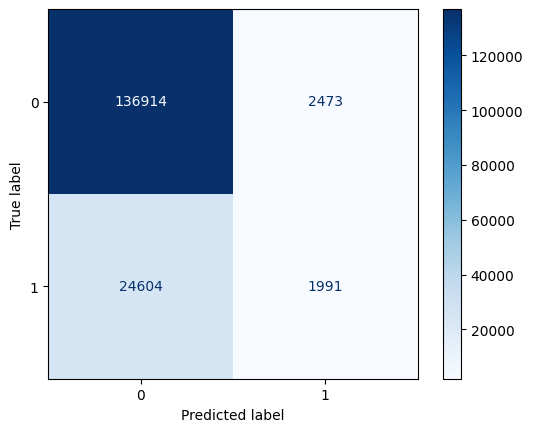

In [31]:
cm = confusion_matrix(y_test_array, y_prediction_classes)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
cm_display.plot(values_format='d', cmap='Blues')